In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
marker_types = ['o', 's', '^', 'D', 'v']
color_list = ["red", "green", "blue", "yellow", "pink", "black", "orange", "purple", "beige", "brown", "gray", "cyan", "magenta"]
font_labels = {'family': 'Arial', 'color': 'black', 'size': 14}
font_titles = {'family': 'Arial', 'color': 'black', 'size': 16}
# grouped bar chart
bar_width = 0.15
#x = np.arange(len(season_order))


In [3]:
csv_path = './final_part_2_data.csv'
litter_df = pd.read_csv(csv_path)

In [4]:
# ----------------------------------------------------
# Stoichiometry (molar)
# ----------------------------------------------------
AW_C = 12.011
AW_N = 14.007
AW_P = 30.974

litter_df["mol_C"] = litter_df["C"] / AW_C
litter_df["mol_N"] = litter_df["N"] / AW_N
litter_df["mol_P"] = litter_df["P"] / AW_P

litter_df["C_N_molar"] = litter_df["mol_C"] / litter_df["mol_N"]
litter_df["C_P_molar"] = litter_df["mol_C"] / litter_df["mol_P"]
litter_df["N_P_molar"] = litter_df["mol_N"] / litter_df["mol_P"]

In [23]:
# percent ratios
litter_df['C:N'] = litter_df['C'] / litter_df['N']
litter_df['C:P'] = litter_df['C'] / litter_df['P']
litter_df['N:P'] = litter_df['N'] / litter_df['P']

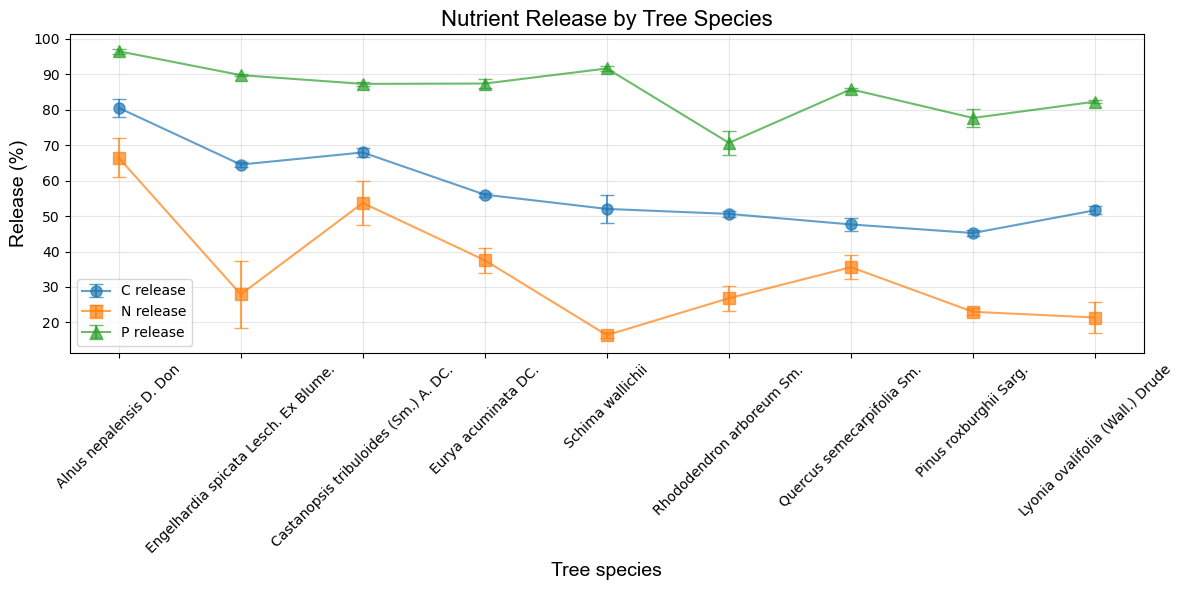

In [22]:
fig, ax = plt.subplots(figsize=(12, 6))

# Create line plots for each release type with different colors, marker types, and error bars
ax.errorbar(litter_df['Tree species'], litter_df['C Release'], yerr=litter_df['C rel std. err'], label='C release', marker=marker_types[0], alpha=0.7, markersize=8, capsize=5)
ax.errorbar(litter_df['Tree species'], litter_df['N Release'], yerr=litter_df['N rel std. err'], label='N release', marker=marker_types[1], alpha=0.7, markersize=8, capsize=5)
ax.errorbar(litter_df['Tree species'], litter_df['P Release'], yerr=litter_df['P rel std. err'], label='P release', marker=marker_types[2], alpha=0.7, markersize=8, capsize=5)

ax.set_xlabel('Tree species', fontdict=font_labels)
ax.set_ylabel('Release (%)', fontdict=font_labels)
ax.set_title('Nutrient Release by Tree Species', fontdict=font_titles)
ax.legend()
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

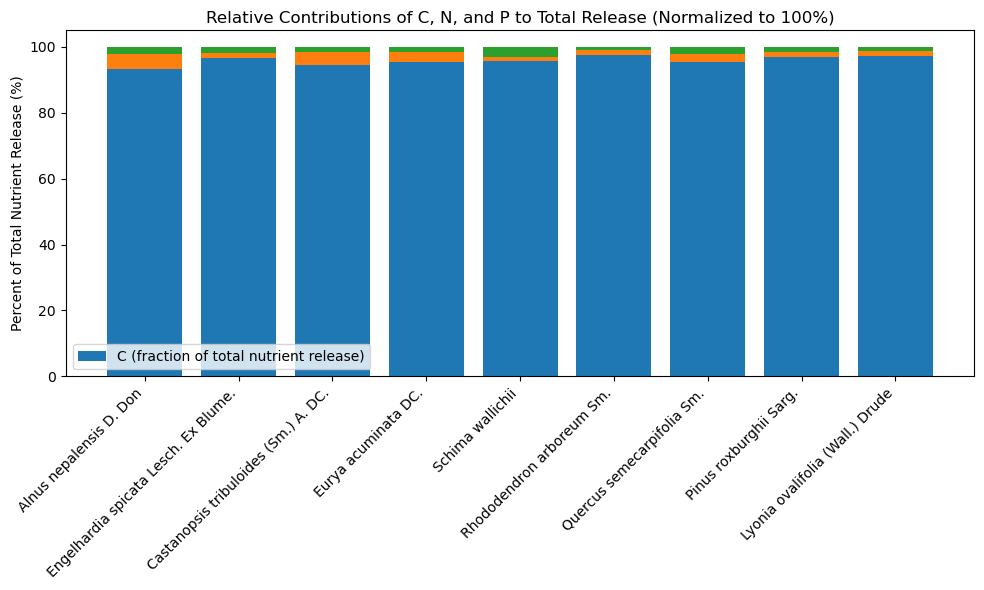

In [5]:
# assume litter_df already loaded
initial_mass = 10.0  # grams

# Extract needed columns
species = litter_df['Tree species']
C_pct = litter_df['C']          # initial C %
N_pct = litter_df['N']          # initial N %
P_pct = litter_df['P']          # initial P %
C_rel = litter_df['C Release'] # % released
N_rel = litter_df['N Release']
P_rel = litter_df['P Release']

# Convert initial elemental percentages to masses (g)
C_init_mass = (C_pct / 100.0) * initial_mass
N_init_mass = (N_pct / 100.0) * initial_mass
P_init_mass = (P_pct / 100.0) * initial_mass

# Compute absolute mass released (g)
C_mass_rel = C_init_mass * (C_rel / 100.0)
N_mass_rel = N_init_mass * (N_rel / 100.0)
P_mass_rel = P_init_mass * (P_rel / 100.0)

# Convert to fractions of total elemental release
total_rel = C_mass_rel + N_mass_rel + P_mass_rel

C_frac = C_mass_rel / total_rel * 100
N_frac = N_mass_rel / total_rel * 100
P_frac = P_mass_rel / total_rel * 100

fig, ax = plt.subplots(figsize=(10, 6))

x = range(len(species))

ax.bar(x, C_frac, label='C (fraction of total nutrient release)')
ax.bar(x, N_frac, bottom=C_frac)
ax.bar(x, P_frac, bottom=C_frac + N_frac)

ax.set_xticks(x)
ax.set_xticklabels(species, rotation=45, ha='right')
ax.set_ylabel('Percent of Total Nutrient Release (%)')
ax.set_title('Relative Contributions of C, N, and P to Total Release (Normalized to 100%)')
ax.legend()

plt.tight_layout()
plt.show()


/var/folders/40/_y1x921s259fffptgdb3lw1m0000gn/T/ipykernel_63842/943579771.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(litter_df["Tree species"], rotation=60)


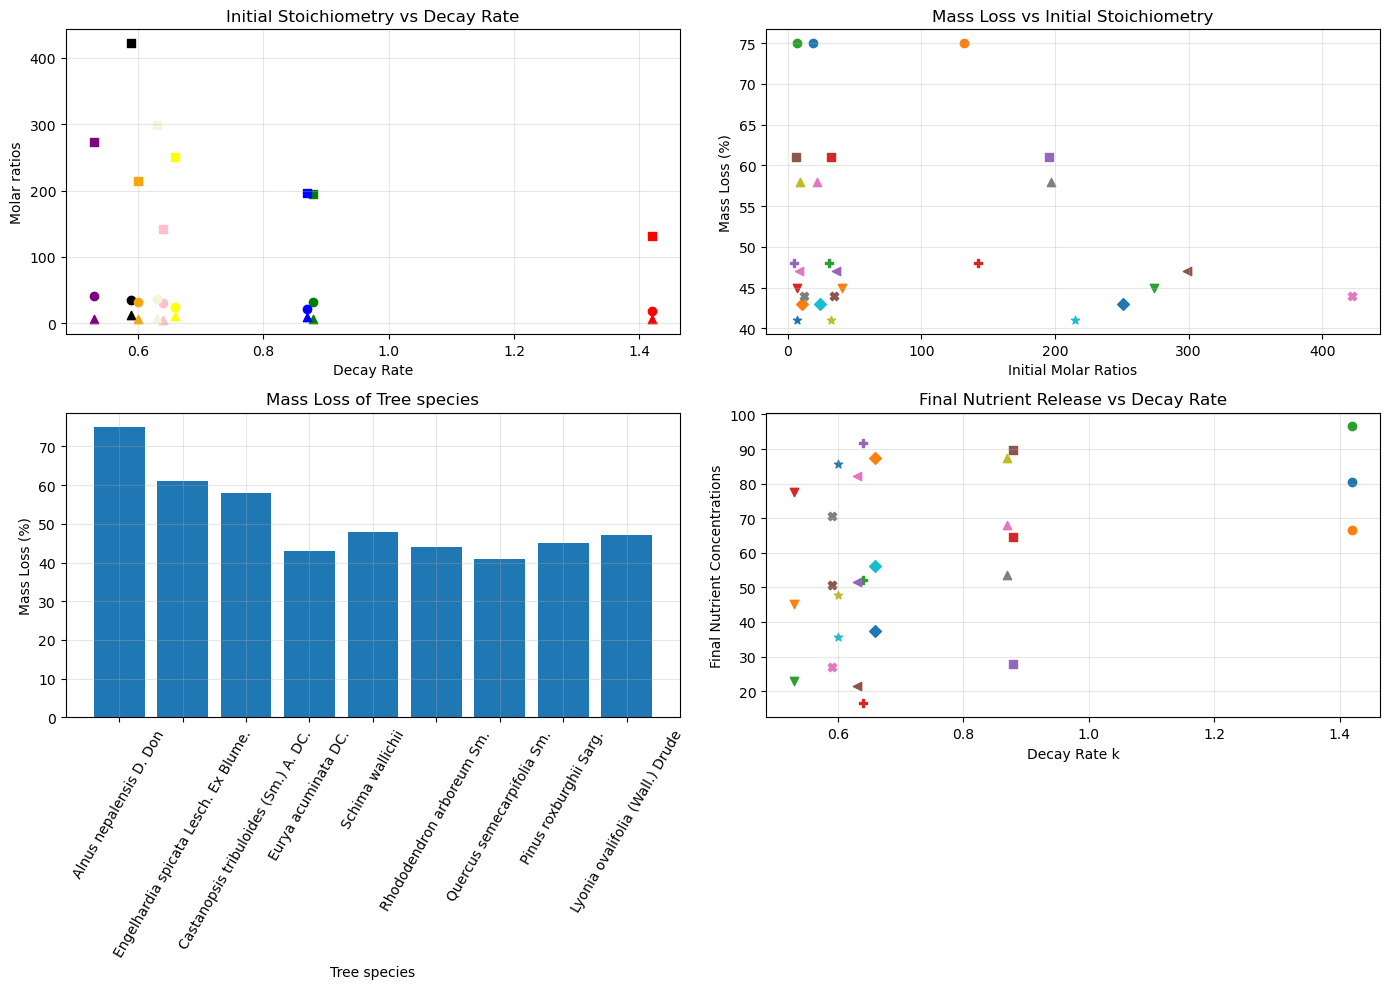

In [20]:

# ----------------------------------------------------
# Define marker types for each species
# ----------------------------------------------------
species_list = litter_df["Tree species"].unique()

markers = {
    species: m for species, m in zip(
        species_list,
        ["o", "s", "^", "D", "P", "X", "*", "v", "<"]  # add more if needed
    )
}
colors = {
    species: m for species, m in zip(
        species_list, color_list  # add more if needed
    )
}

# ----------------------------------------------------
# Figure layout
# ----------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
ax1, ax2, ax3, ax4 = axes.flatten()

# ----------------------------------------------------
# Panel 1 — Decay rate vs Initial Stoichiometry
# ----------------------------------------------------
for species in species_list:
    group = litter_df[litter_df["Tree species"] == species]
    ax1.scatter(group["K"], group["C_N_molar"], marker=marker_types[0], c=colors[species], label="C:N")
    ax1.scatter(group["K"], group["C_P_molar"], marker=marker_types[1], c=colors[species], label="C:P")
    ax1.scatter(group["K"], group["N_P_molar"], marker=marker_types[2],c=colors[species], label="N:P")

ax1.set_xlabel("Decay Rate")
ax1.set_ylabel("Molar ratios")
ax1.set_title("Initial Stoichiometry vs Decay Rate")

# Collapse legend to species only
handles, labels = ax1.get_legend_handles_labels()
unique = {}
for h, L in zip(handles, labels):
    key = L.split()[0]  # species name only
    if key not in unique:
        unique[key] = h

#ax1.legend(unique.values(), unique.keys(), frameon=False)

# ----------------------------------------------------
# Panel 2 — Stoichiometry vs Percent Mass Loss
# ----------------------------------------------------
for species in species_list:
    group = litter_df[litter_df["Tree species"] == species]
    ax2.scatter(group["C_N_molar"], group["Litter Mass Loss"], marker=markers[species])
    ax2.scatter(group["C_P_molar"], group["Litter Mass Loss"], marker=markers[species])
    ax2.scatter(group["N_P_molar"], group["Litter Mass Loss"], marker=markers[species])

ax2.set_xlabel("Initial Molar Ratios")
ax2.set_ylabel("Mass Loss (%)")
ax2.set_title("Mass Loss vs Initial Stoichiometry")

# ----------------------------------------------------
# Panel 3 — Percent Mass Loss for each species
# ----------------------------------------------------

ax3.bar(litter_df["Tree species"], litter_df["Litter Mass Loss"])

ax3.set_xticklabels(litter_df["Tree species"], rotation=60)
ax3.set_xlabel("Tree species")
ax3.set_ylabel("Mass Loss (%)")
ax3.set_title("Mass Loss of Tree species")

# ----------------------------------------------------
# Panel 4 — Decay Rate k vs Final Nutrient Release
# ----------------------------------------------------
for species in species_list:
    group = litter_df[litter_df["Tree species"] == species]
    ax4.scatter(group["K"], group["C Release"], marker=markers[species])
    ax4.scatter(group["K"], group["N Release"], marker=markers[species])
    ax4.scatter(group["K"], group["P Release"], marker=markers[species])

ax4.set_xlabel("Decay Rate k")
ax4.set_ylabel("Final Nutrient Concentrations")
ax4.set_title("Final Nutrient Release vs Decay Rate")

# ----------------------------------------------------
# Styling and layout
# ----------------------------------------------------
for ax in [ax1, ax2, ax3, ax4]:
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


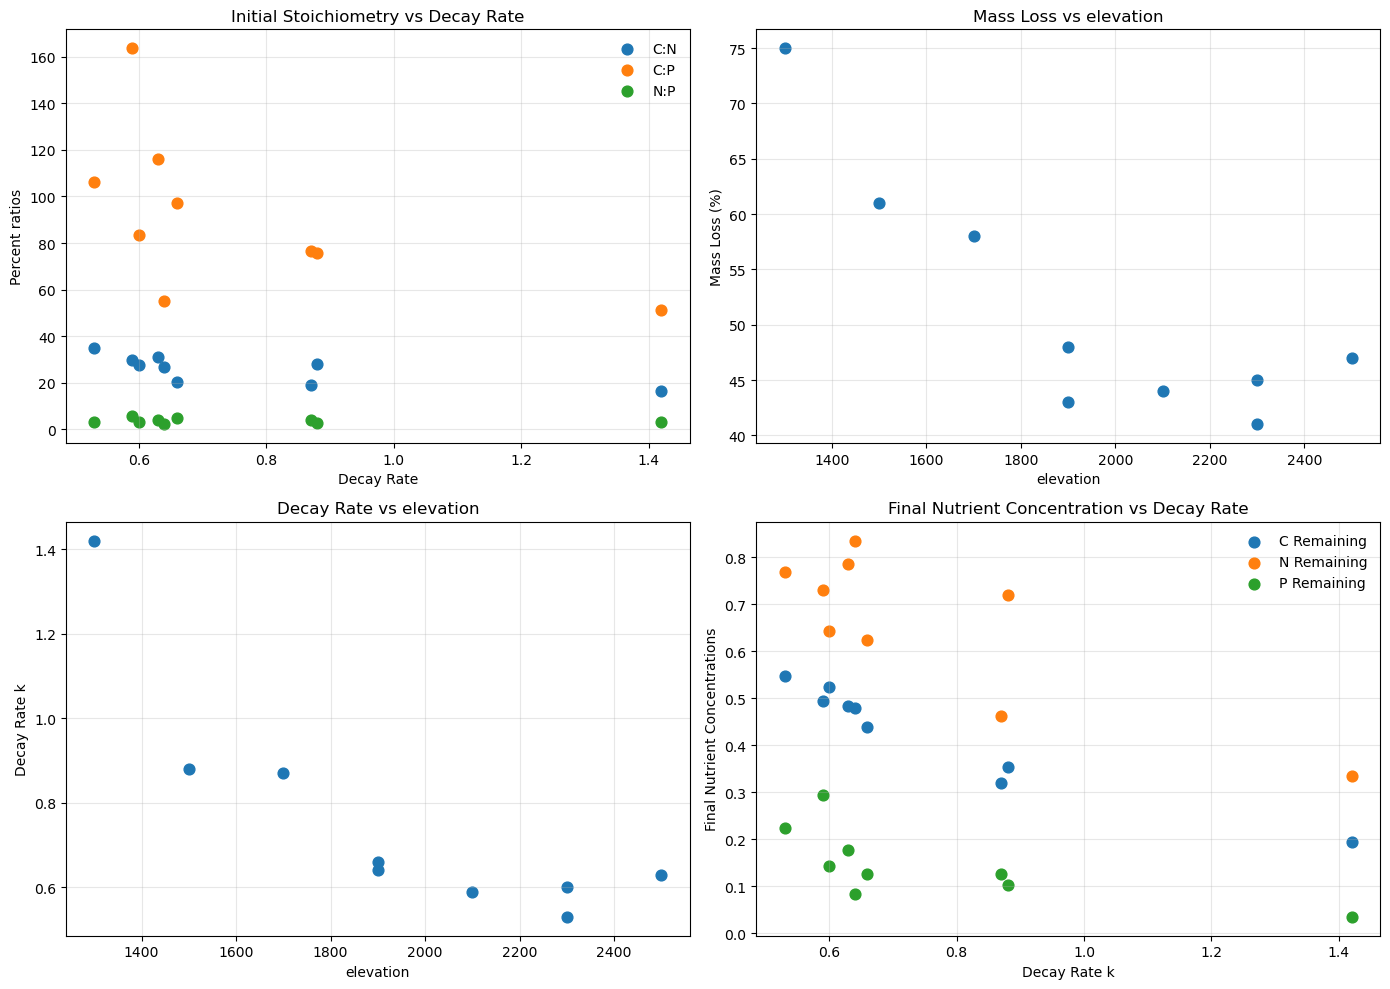

In [28]:

# ----------------------------------------------------
# Figure layout
# ----------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
ax1, ax2, ax3, ax4 = axes.flatten()

# ----------------------------------------------------
# Panel 1 — Initial Stoichiometry vs decay rate
# ----------------------------------------------------
ax1.scatter(litter_df["K"], litter_df["C:N"], label="C:N", s=60)
ax1.scatter(litter_df["K"], litter_df["C:P"], label="C:P", s=60)
ax1.scatter(litter_df["K"], litter_df["N:P"], label="N:P", s=60)

ax1.set_xlabel("Decay Rate")
ax1.set_ylabel("Percent ratios")
ax1.set_title("Initial Stoichiometry vs Decay Rate")
ax1.legend(frameon=False)

# ----------------------------------------------------
# Panel 2 — elevation vs Percent Mass Loss
# ----------------------------------------------------
ax2.scatter(litter_df["elevation"], litter_df["Litter Mass Loss"], label="mass loss", s=60) # use tree species instead (plotted in cell above)

ax2.set_xlabel("elevation")
ax2.set_ylabel("Mass Loss (%)")
ax2.set_title("Mass Loss vs elevation")

# ----------------------------------------------------
# Panel 3 — elevation vs Decay Rate k
# ----------------------------------------------------
ax3.scatter(litter_df["elevation"], litter_df["K"], s=60) # probably keep
ax3.set_xlabel("elevation")
ax3.set_ylabel("Decay Rate k")
ax3.set_title("Decay Rate vs elevation")

# ----------------------------------------------------
# Panel 4 — Decay Rate k vs Final Nutrient Release
# ----------------------------------------------------
ax4.scatter(litter_df["K"], 1 - (litter_df['C Release'] / 100), label="C Remaining", s=60)
ax4.scatter(litter_df["K"], 1 - (litter_df['N Release'] / 100), label="N Remaining", s=60)
ax4.scatter(litter_df["K"], 1 - (litter_df['P Release'] / 100), label="P Remaining", s=60)

ax4.set_xlabel("Decay Rate k")
ax4.set_ylabel("Final Nutrient Concentrations")
ax4.set_title("Final Nutrient Concentration vs Decay Rate")
ax4.legend(frameon=False)

# ----------------------------------------------------
# Styling and tight layout
# ----------------------------------------------------
for ax in [ax1, ax2, ax3, ax4]:
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


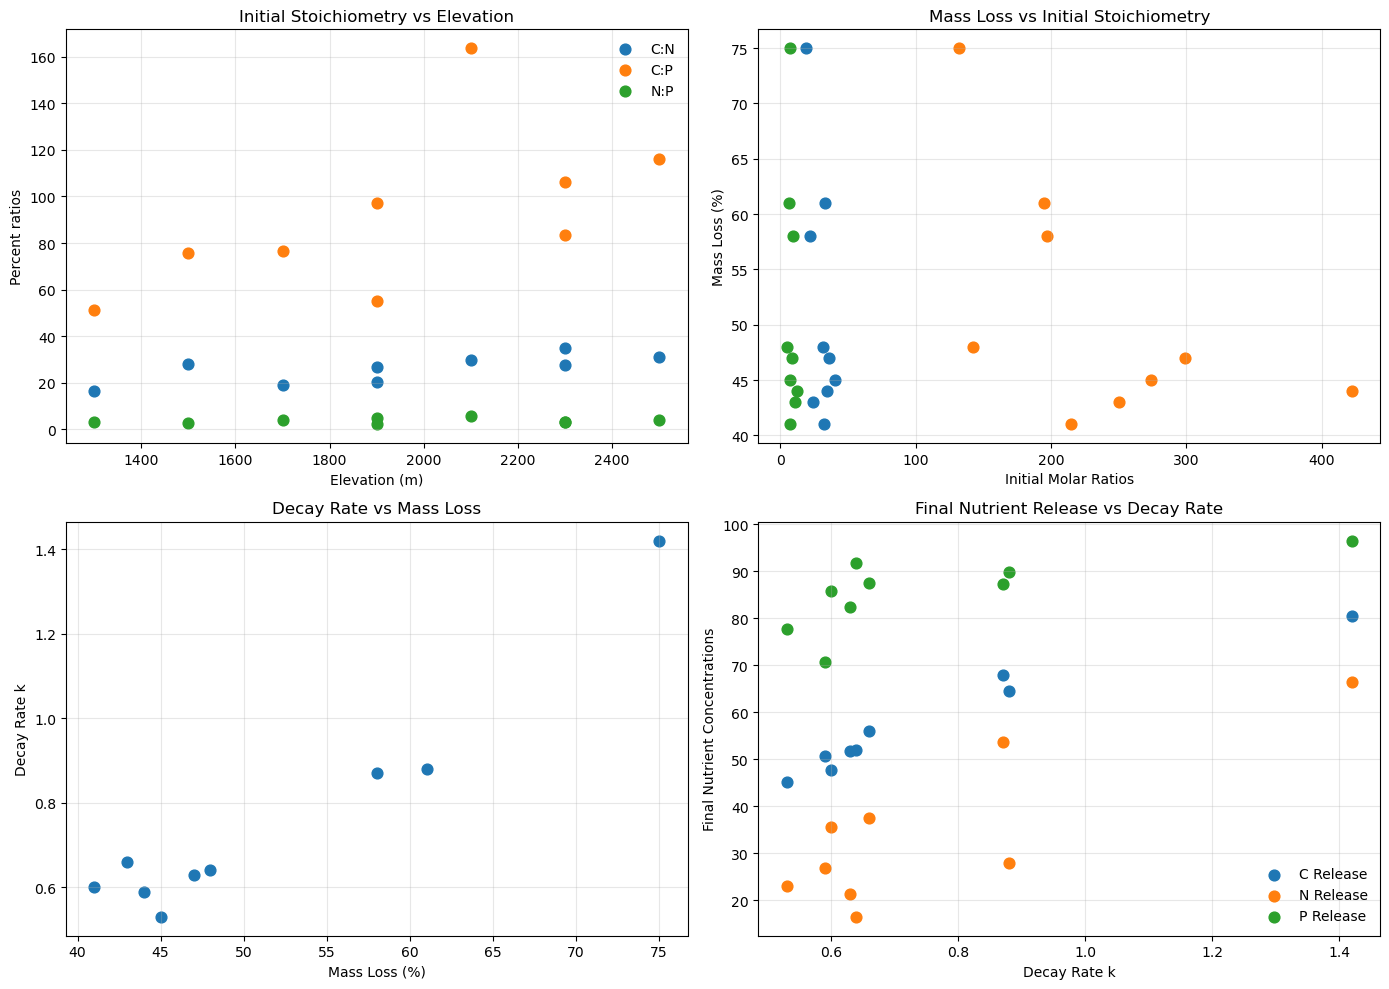

In [26]:
# original

# ----------------------------------------------------
# Figure layout
# ----------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
ax1, ax2, ax3, ax4 = axes.flatten()

# ----------------------------------------------------
# Panel 1 — Elevation vs Initial Stoichiometry
# ----------------------------------------------------
ax1.scatter(litter_df["elevation"], litter_df["C:N"], label="C:N", s=60)
ax1.scatter(litter_df["elevation"], litter_df["C:P"], label="C:P", s=60)
ax1.scatter(litter_df["elevation"], litter_df["N:P"], label="N:P", s=60)

ax1.set_xlabel("Elevation (m)")
ax1.set_ylabel("Percent ratios")
ax1.set_title("Initial Stoichiometry vs Elevation")
ax1.legend(frameon=False)

# ----------------------------------------------------
# Panel 2 — Stoichiometry vs Percent Mass Loss
# ----------------------------------------------------
ax2.scatter(litter_df["C_N_molar"], litter_df["Litter Mass Loss"], label="C:N", s=60)
ax2.scatter(litter_df["C_P_molar"], litter_df["Litter Mass Loss"], label="C:P", s=60)
ax2.scatter(litter_df["N_P_molar"], litter_df["Litter Mass Loss"], label="N:P", s=60)

ax2.set_xlabel("Initial Molar Ratios")
ax2.set_ylabel("Mass Loss (%)")
ax2.set_title("Mass Loss vs Initial Stoichiometry")

# ----------------------------------------------------
# Panel 3 — Percent Mass Loss vs Decay Rate k
# ----------------------------------------------------
ax3.scatter(litter_df["Litter Mass Loss"], litter_df["K"], s=60)
ax3.set_xlabel("Mass Loss (%)")
ax3.set_ylabel("Decay Rate k")
ax3.set_title("Decay Rate vs Mass Loss")

# ----------------------------------------------------
# Panel 4 — Decay Rate k vs Final Nutrient Release
# ----------------------------------------------------
ax4.scatter(litter_df["K"], litter_df['C Release'], label="C Release", s=60)
ax4.scatter(litter_df["K"], litter_df["N Release"], label="N Release", s=60)
ax4.scatter(litter_df["K"], litter_df["P Release"], label="P Release", s=60)

ax4.set_xlabel("Decay Rate k")
ax4.set_ylabel("Final Nutrient Concentrations")
ax4.set_title("Final Nutrient Release vs Decay Rate")
ax4.legend(frameon=False)

# ----------------------------------------------------
# Styling and tight layout
# ----------------------------------------------------
for ax in [ax1, ax2, ax3, ax4]:
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


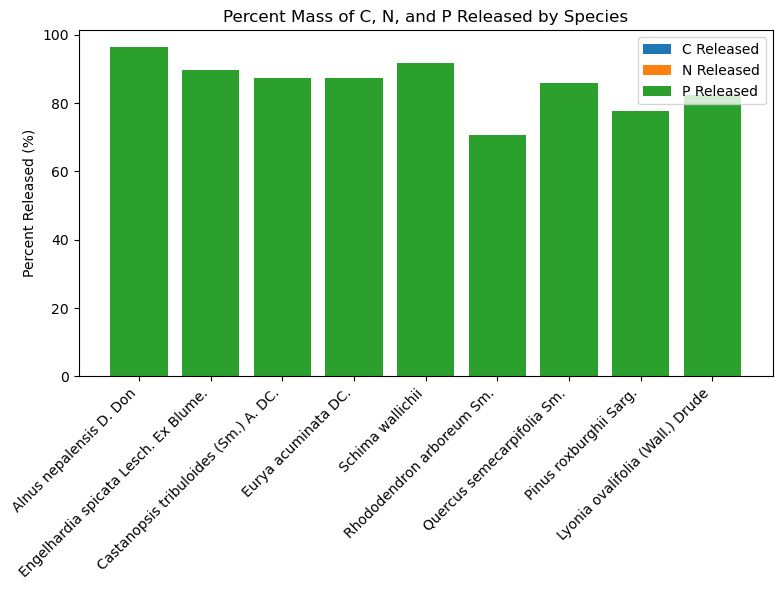

In [ ]:
# Extract raw percent-release columns directly
species = litter_df['Tree species']
c_vals = litter_df['C Release']
n_vals = litter_df['N Release']
p_vals = litter_df['P Release']

fig, ax = plt.subplots(figsize=(10, 6))

# Create positions for grouped bar chart
positions = np.arange(len(species))
bar_width = 0.25

ax.bar(positions - bar_width, c_vals, width=bar_width, label='C Released')
ax.bar(positions, n_vals, width=bar_width, label='N Released')
ax.bar(positions + bar_width, p_vals, width=bar_width, label='P Released')

ax.set_xticks(positions)
ax.set_xticklabels(species, rotation=45, ha='right')
ax.set_ylabel('Percent Released (%)')
ax.set_title('Percent Mass of C, N, and P Released by Species')
ax.legend()

plt.tight_layout()
plt.show()
